# TUGAS 3 METODE NUMERIK
__Solusi Sistem Persamaan Linear : Metode Langsung__

### 5.5.2 Soal Pemrograman

```Nama : Antonius Aditya Rizky Wijaya```

```NIM : G5402221003```

<hr style="border:2px solid black"> </hr>

#### __Kumpulan Function yang diperlukan__
```Function-function ini harus dijalankan terlebih dahulu sebelum menjalankan program yang lain```

In [272]:
# Substitusi Mundur

function backsub(A,B)
    # Hitung ukuran matriks dan inisiasi solusi X
    n = length(B);
    X = zeros(n,1);
    # Hitung nilai solusi X ke-n
    X[n] = B[n]/A[n,n];
    # Hitung nilai solusi X ke- n-1 sampai X ke-1
    for i = n-1:-1:1
        X[i] = (B[i] - A[i,i+1:n]'X[i+1:n])/A[i,i];
    end
    return X
end;

In [273]:
# Substitusi Maju

function forwardsub(A,B)
    # Hitung ukuran matriks dan inisiasi solusi X
    n = length(B);
    X = zeros(n,1);
    # Hitung nilai solusi X ke-1
    X[1] = B[1]/A[1,1];
    # Hitung nilai solusi X ke-1 sampai X ke-n
    for i = 2:n
        X[i] = (B[i] - A[i,1:i-1]'X[1:i-1])/A[i,i];
    end
    return X
end;

In [274]:
# Metode Eliminasi Gauss Tanpa Pivoting

function elimGaussNonPivoting(A,b)
    # Hitung ukuran matriks dan inisiasi solusi X
    n = length(b);
    X = zeros(n,1);
    # Buatlah matriks Gandeng [A|b]
    Aug = [A b];
    # Lakukan operasi baris dasar terhadap matriks gandeng
    for p = 1:n-1 # p menunjukkan kolom
        # Jika pivot bernilai nol, maka gagal.
        if Aug[p,p]==0
            error("Harus Pakai Pivoting")
        end
        # Lakukan eliminasi menggunakan operasi Eij(k)
        for i = p+1:n # i menunjukkan baris
            k = Aug[i,p]/Aug[p,p];
            Aug[i,:] = Aug[i,:] - k*Aug[p,:];
        end
    end;
    # Pisahkan matriks gandeng, kemudian substitusi mundur
    A = Aug[:,1:n];
    b = Aug[:,1+n];
    X = backsub(A,b);
end;

In [275]:
# Metode Eliminasi Gauss Dengan Pivoting

function elimGaussWithPivoting(A,b)
    # Hitung ukuran matriks dan inisiasi solusi X
    n = length(b);
    X = zeros(n,1);
    # Buatlah matriks Gandeng [A|b]
    Aug = [A b];
    # Lakukan operasi baris dasar terhadap matriks gandeng
    for p = 1:n-1
        # Lakukan operasi pindah baris untuk menentukan nilai pivot
        val,j = findmax(abs.(Aug[p:n,p]));
        C = Aug[p,:];
        Aug[p,:] = Aug[j+p-1,:];
        Aug[j+p-1,:] = C;
        # Jika pivot bernilai nol, maka gagal.
        if Aug[p,p] == 0;
            error("Matriks tidak punya solusi tunggal")
        end
        # Lakukan eliminasi menggunakan operasi Eij(k)
        for i = p+1:n
            k = Aug[i,p]/Aug[p,p];
            Aug[i,:] = Aug[i,:] - k*Aug[p,:];
        end
    end;
    # Pisahkan matriks gandeng, kemudian substitusi mundur.
    A = Aug[:,1:n];
    b = Aug[:,1+n];
    X = backsub(A,b);
end;

In [276]:
# Metode Faktorisasi LU Tanpa Pivoting

function LUtanpaP(A);
    # Definisikan matriks L sebagai pencatat pengali.
    n,n = size(A);
    L = zeros(n,n);
    # Lakukan operasi baris dasar terhadap matriks
    Aug = copy(A);
    for p = 1:n-1
        # Jika pivot bernilai nol, maka gagal.
        if Aug[p,p]==0
            error("Pivot bernilai nol");
        end
        # Lakukan eliminasi lalu simpan pengali pada matriks L.
        for i = p+1:n
            k = Aug[i,p]/Aug[p,p];
            Aug[i,1:n] = Aug[i,1:n] - k*Aug[p,1:n];
            L[i,p] = k;
        end
    end;
    U = Aug;
    L = L .+ I(n);
    return L, U
end;

In [277]:
# Metode Faktorisasi LU Dengan Pivoting

function LUdenganP(A)
    # Definisikan matriks L dan P.
    n,n = size(A);
    L = zeros(n,n);
    P = Array(I(n));
    # Lakukan operasi baris dasar terhadap matriks gandeng
    Aug = copy(A)
    for p = 1:n-1
        # Lakukan operasi pindah baris untuk menentukan nilai pivot
        val,j = findmax(abs.(Aug[p:n,p]));
        # Pivoting U
        C = Aug[p,:];
        Aug[p,:] = Aug[j+p-1,:];
        Aug[j+p-1,:] = C;
        # Pivoting L
        C = L[p,:];
        L[p,:] = L[j+p-1,:];
        L[j+p-1,:] = C;
        # Pivoting P
        C = P[p,:];
        P[p,:] = P[j+p-1,:];
        P[j+p-1,:] = C;
        # Jika pivot bernilai nol, maka gagal.
        if Aug[p,p]==0
            error("Matriks Singular")
        end
        # Lakukan eliminasi dan simpan pengali.
        for i = p+1:n
            k = Aug[i,p]/Aug[p,p]
            Aug[i,1:n] = Aug[i,1:n] - k*Aug[p,1:n];
            L[i,p] = k;
        end
    end
    U = Aug;
    L = L + I(n);
    return L,U,P
end;

<hr style="border:2px solid black"> </hr>

### __Soal 1__

Diberikan sistem persamaan linear (SPL) berikut:
$$4x_{1} +8x_{2} +4x_{3} = 8$$
$$x_{1} +5x_{2} +4x_{3} −3x_{4} = −4$$
$$x_{1} +4x_{2} +7x_{3} +2x_{4} = 10$$
$$x_{1} +3x_{2} −2x_{4} = −4$$

__(a)__ Selesaikan SPL $AX = B$ menggunakan eliminasi Gauss tanpa _pivoting_.

__(b)__ Selesaikan SPL $AX = B$ menggunakan eliminasi Gauss dengan _pivoting_.

In [278]:
A = [4 8 4 0
     1 5 4 -3
     1 4 7 2
     1 3 0 -2];
B = [8; -4; 10; -4];

In [279]:
# (a)
Xnp = elimGaussNonPivoting(A,B)

4×1 Matrix{Float64}:
  3.0
 -1.0
  1.0
  2.0

In [280]:
# (b)
Xp = elimGaussWithPivoting(A,B)

4×1 Matrix{Float64}:
  3.0
 -1.0
  1.0
  2.0

<hr style="border:2px solid black"> </hr>

### __Soal 2__

Pembentukan matriks acak

$•$ Bangkitkan matriks bilangan acak A = $(a_{ij})_{(n x n)} ∈ Z$ pada selang $[-n, n]$. 

$•$ Tetapkan matriks $B = A • (1)_{(n×1)}$ sehingga solusi dari SPL $AX = B$ adalah $X^* = (1)_{(n×1)}$

$•$ Cari solusi numerik $X_{1}$ menggunakan eliminasi Gauss tanpa _pivoting_.

$•$ Cari solusi numerik $X_{2}$ menggunakan eliminasi Gauss dengan _pivoting_.

$•$ Hitung panjang vektor galat, yaitu solusi numerik $X_{1}$ dan $X_{2}$ terhadap solusi eksak $X^*$.

Lakukan beberapa tahapan tersebut untuk:

__(a)__ $n = 20$

__(b)__ $n = 50$

__(c)__ $n = 100$

__(d)__ $n = 500$

In [282]:
using LinearAlgebra
function matriks_random(n)
    return rand(-n:n, n, n)
end;

function matriks_B(A)
    return A * ones(size(A, 2))
end;

function hitung_err(x1, x2, xeksak)
    En = norm(x1 - xeksak)
    Ep = norm(x2 - xeksak)
    return En, Ep
end;

In [283]:
# (a)

n = 20
A2_a = matriks_random(n)
xeksak = ones(n)
B2_a = matriks_B(A2_a)
x1 = elimGaussNonPivoting(A2_a, B2_a)
x2 = elimGaussWithPivoting(A2_a, B2_a)
En, Ep = hitung_err(x1, x2, xeksak)
println("\e[1mn = 20\e[0m")
println("Error dari eliminasi Gauss tanpa pivoting: ", En)
println("Error dari eliminasi Gauss dengan pivoting: ", Ep)

n = 20
Error dari eliminasi Gauss tanpa pivoting: 6.584652173326501e-14
Error dari eliminasi Gauss dengan pivoting: 5.511002163945225e-15


In [284]:
# (b)

n = 50
A2_b = matriks_random(n)
xeksak = ones(n)
B2_b = matriks_B(A2_b)
x1 = elimGaussNonPivoting(A2_b, B2_b)
x2 = elimGaussWithPivoting(A2_b, B2_b)
En, Ep = hitung_err(x1, x2, xeksak)
println("\e[1mn = 50\e[0m")
println("Error dari eliminasi Gauss tanpa pivoting: ", En)
println("Error dari eliminasi Gauss dengan pivoting: ", Ep)

n = 50
Error dari eliminasi Gauss tanpa pivoting: 1.6426165743191907e-12
Error dari eliminasi Gauss dengan pivoting: 2.7693555879413473e-14


In [285]:
# (c)

n = 100
A2_c = matriks_random(n)
xeksak = ones(n)
B2_c = matriks_B(A2_c)
x1 = elimGaussNonPivoting(A2_c, B2_c)
x2 = elimGaussWithPivoting(A2_c, B2_c)
En, Ep = hitung_err(x1, x2, xeksak)
println("\e[1mn = 100\e[0m")
println("Error dari eliminasi Gauss tanpa pivoting: ", En)
println("Error dari eliminasi Gauss dengan pivoting: ", Ep)

n = 100
Error dari eliminasi Gauss tanpa pivoting: 9.591536838404963e-12
Error dari eliminasi Gauss dengan pivoting: 8.445419188210297e-14


In [286]:
# (d)

n = 500
A2_d = matriks_random(n)
xeksak = ones(n)
B2_d = matriks_B(A2_d)
x1 = elimGaussNonPivoting(A2_d, B2_d)
x2 = elimGaussWithPivoting(A2_d, B2_d)
En, Ep = hitung_err(x1, x2, xeksak)
println("\e[1mn = 500\e[0m")
println("Error dari eliminasi Gauss tanpa pivoting: ", En)
println("Error dari eliminasi Gauss dengan pivoting: ", Ep)

n = 500
Error dari eliminasi Gauss tanpa pivoting: 7.828780481743409e-10
Error dari eliminasi Gauss dengan pivoting: 9.177261925075678e-12


__Penjelasan :__

Berdasarkan hasil berbagai variasi nilai n yang digunakan, didapatkan nilai error dari metode eliminasi Gauss dengan pivoting lebih kecil daripada metode eliminasi Gauss tanpa pivoting. Hal ini ditunjukkan dari nilai __Ep < En__.

<hr style="border:2px solid black"> </hr>

### __Soal 3__

Diberikan matriks tridiagonal sebagai berikut:

$$\begin{align*}
\begin{bmatrix}
  -4 &  1 & 0 &  0 & 0 & 0 & 0 &  0\\
  1 & -4 & 1 &  0 & 0 & 0 & 0 &  0\\
  0 & 1 &  -4 & 1 & 0 & 0 & 0 &  0\\
  0 & 0 & 1 &  -4 & 1 & 0 & 0 &  0\\
  0 & 0 & 0 &  1 & -4 & 1 & 0 &  0\\
  0 & 0 & 0 &  0 & 1 & -4 & 1 &  0\\
  0 & 0 & 0 &  0 & 0 & 1 & -4 &  1\\
  0 & 0 & 0 &  0 & 0 & 0 & 1 &  -4\\
\end{bmatrix}
\begin{bmatrix}
x_1\\x_2\\x_3\\x_4\\x_5\\x_6\\x_7\\x_8\\
\end{bmatrix}=
\begin{bmatrix}
2\\2\\2\\2\\2\\2\\2\\2\\
\end{bmatrix}
\end{align*}$$

__(a)__ Gunakan metode eliminasi Gauss untuk mencari solusi SPL di atas.

__(b)__ Apa yang terjadi terhadap nilai solusi jika dimensi SPL $AX = B$ diubah menjadi $A_{10×10}$, $A_{25×25}$, dan $A_{50×50}$.

In [287]:
# (a)

using LinearAlgebra
A3 = diagm(0 => -4*ones(8), 1 => 1*ones(7), -1 => 1*ones(7));
B3 = 2*ones(8);

In [288]:
Xp3 = elimGaussWithPivoting(A3,B3)

8×1 Matrix{Float64}:
 -0.7320261437908497
 -0.9281045751633987
 -0.9803921568627451
 -0.9934640522875817
 -0.9934640522875818
 -0.9803921568627452
 -0.9281045751633987
 -0.7320261437908497

In [289]:
# (b)

A3_10 = diagm(0 => -4*ones(10), 1 => 1*ones(9), -1 => 1*ones(9));
B3_10 = 2*ones(10);
A3_25 = diagm(0 => -4*ones(25), 1 => 1*ones(24), -1 => 1*ones(24));
B3_25 = 2*ones(25);
A3_50 = diagm(0 => -4*ones(50), 1 => 1*ones(49), -1 => 1*ones(49));
B3_50 = 2*ones(50);

In [290]:
Xp3_10 = elimGaussWithPivoting(A3_10,B3_10)

10×1 Matrix{Float64}:
 -0.7320490367775832
 -0.9281961471103327
 -0.9807355516637478
 -0.9947460595446584
 -0.9982486865148862
 -0.9982486865148861
 -0.9947460595446584
 -0.9807355516637478
 -0.9281961471103327
 -0.7320490367775832

In [291]:
Xp3_25 = elimGaussWithPivoting(A3_25,B3_25)

25×1 Matrix{Float64}:
 -0.7320508075688726
 -0.9282032302754905
 -0.9807621135330893
 -0.9948452238568671
 -0.9986187818943792
 -0.9996299037206494
 -0.9999008329882185
 -0.9999734282322243
 -0.9999928799406789
 -0.9999980915304912
 -0.999999486181286
 -0.999999853194653
 -0.9999999265973265
 -0.9999998531946532
 -0.9999994861812861
 -0.9999980915304914
 -0.999992879940679
 -0.9999734282322243
 -0.9999008329882184
 -0.9996299037206494
 -0.9986187818943791
 -0.9948452238568672
 -0.9807621135330894
 -0.9282032302754906
 -0.7320508075688726

In [292]:
Xp3_50 = elimGaussWithPivoting(A3_50,B3_50)

50×1 Matrix{Float64}:
 -0.7320508075688773
 -0.9282032302755091
 -0.9807621135331593
 -0.9948452238571285
 -0.9986187818953544
 -0.999629903724289
 -0.9999008330018014
 -0.9999734282829169
 -0.9999928801298661
 -0.9999980922365473
 -0.9999994888163234
 -0.9999998630287467
 -0.9999999632986633
  ⋮
 -0.9999998630287468
 -0.9999994888163235
 -0.9999980922365475
 -0.9999928801298661
 -0.9999734282829169
 -0.9999008330018014
 -0.999629903724289
 -0.9986187818953544
 -0.9948452238571285
 -0.9807621135331595
 -0.9282032302755091
 -0.7320508075688773

__Penjelasan :__

Jika SPL $AX = B$ diubah menjadi $A_{10×10}$, $A_{25×25}$, dan $A_{50×50}$, empat nilai solusi awal dan empat nilai solusi akhir akan mendekati nilai dari solusi SPL $A_{8×8}$. Sementara solusi lainnya akan memiliki nilai yang mendekati -1. 

<hr style="border:2px solid black"> </hr>

### __Soal 4__

Diberikan suatu sistem persamaan linear (SPL) sebagai berikut:

$$\begin{align*}
\begin{bmatrix}
  12 &  -2 & 1 &  0 & 0 & 0 & 0 &  0\\
  -2 & 12 & -2 &  1 & 0 & 0 & 0 &  0\\
  1 & -2 &  12 & -2 & 1 & 0 & 0 &  0\\
  0 & 1 & -2 &  12 & -2 & 1 & 0 &  0\\
  0 & 0 & 1 &  -2 & 12 & -2 & 1 &  0\\
  0 & 0 & 0 &  1 & -2 & 12 & -2 &  1\\
  0 & 0 & 0 &  0 & 1 & -2 & 12 &  -2\\
  0 & 0 & 0 &  0 & 0 & 1 & -2 &  12\\
\end{bmatrix}
\begin{bmatrix}
x_1\\x_2\\x_3\\x_4\\x_5\\x_6\\x_7\\x_8\\
\end{bmatrix}=
\begin{bmatrix}
5\\5\\5\\5\\5\\5\\5\\5\\
\end{bmatrix}
\end{align*}$$

__(a)__ Gunakan metode eliminasi Gauss untuk mencari solusi SPL di atas.

__(b)__ Apa yang terjadi terhadap nilai solusi jika dimensi SPL $AX = B$ diubah menjadi $A_{10×10}$, $A_{25×25}$, dan $A_{50×50}$.

In [293]:
# (a)

A4 = diagm(0 => 12*ones(8), 1 => -2*ones(7), -1 => -2*ones(7), 2 => ones(6), -2 => ones(6));
B4 = 5*ones(8);

In [294]:
Xp4 = elimGaussWithPivoting(A4,B4)

8×1 Matrix{Float64}:
 0.4638114830746212
 0.5373729817343058
 0.5090081665731563
 0.49716351848388507
 0.49716351848388507
 0.5090081665731562
 0.5373729817343058
 0.46381148307462133

In [295]:
# (b)

A4_10 = diagm(0 => 12*ones(10), 1 => -2*ones(9), -1 => -2*ones(9), 2 => ones(8), -2 => ones(8));
B4_10 = 5*ones(10);
A4_25 = diagm(0 => 12*ones(25), 1 => -2*ones(24), -1 => -2*ones(24), 2 => ones(23), -2 => ones(23));
B4_25 = 5*ones(25);
A4_50 = diagm(0 => 12*ones(50), 1 => -2*ones(49), -1 => -2*ones(49), 2 => ones(48), -2 => ones(48));
B4_50 = 5*ones(50);

In [296]:
Xp4_10 = elimGaussWithPivoting(A4_10,B4_10)

10×1 Matrix{Float64}:
 0.463793380893633
 0.5372794078206297
 0.5090382449176635
 0.4983103577750362
 0.49892721128573736
 0.49892721128573725
 0.49831035777503613
 0.5090382449176635
 0.5372794078206297
 0.46379338089363303

In [297]:
Xp4_25 = elimGaussWithPivoting(A4_25,B3_25)

25×1 Matrix{Float64}:
 0.18551820952661488
 0.2149138420799545
 0.20360916984053037
 0.19928865377483637
 0.19957674409660253
 0.19999414049627454
 0.2000354895424611
 0.2000061275479962
 0.19999791748240578
 0.1999991429775045
 0.20000004171967123
 0.20000007512610388
 0.20000001808875612
 0.20000007512610385
 0.20000004171967126
 0.19999914297750448
 0.19999791748240575
 0.2000061275479962
 0.20003548954246106
 0.19999414049627456
 0.19957674409660256
 0.1992886537748364
 0.20360916984053032
 0.21491384207995448
 0.18551820952661488

In [298]:
Xp4_50 = elimGaussWithPivoting(A4_50,B4_50)

50×1 Matrix{Float64}:
 0.46379552381655004
 0.5372846051999656
 0.5090229246013307
 0.4982216344361741
 0.49894186023976195
 0.4999853512481307
 0.5000887238901356
 0.500015318846052
 0.49999479326697527
 0.4999978569134675
 0.500000108425199
 0.5000002015766875
 0.5000000226109451
 ⋮
 0.5000002015766873
 0.500000108425199
 0.49999785691346743
 0.4999947932669753
 0.500015318846052
 0.5000887238901357
 0.49998535124813076
 0.49894186023976195
 0.49822163443617407
 0.5090229246013306
 0.5372846051999656
 0.46379552381655004

__Penjelasan :__

Jika SPL $AX = B$ diubah menjadi $A_{10×10}$ dan $A_{50×50}$, empat nilai solusi awal dan empat nilai solusi akhir akan mendekati nilai dari solusi SPL $A_{8×8}$. Sementara solusi lainnya akan memiliki nilai yang mendekati 0,5. Namun jika SPL $AX = B$ diubah menjadi $A_{25×25}$, maka menghasilkan nilai solusi yang berbeda dari pengubahan yang lainnya, yang terlihat disini bahwa nilai solusinya cenderung mendekati 0,2.

<hr style="border:2px solid black"> </hr>

### __Soal 5__

Diberikan sistem persamaan linear seperti berikut.

$$\begin{align*}
\begin{bmatrix}
  8 &  1 & 0 &  0 & 0 & 0 & 0 &  0 & 0\\
  1 & 8 & 1 &  0 & 0 & 0 & 0 &  0 & 0\\
  0 & 1 &  8 & 1 & 0 & 0 & 0 &  0 & 0\\
  0 & 0 & 1 &  8 & 1 & 0 & 0 &  0 & 0\\
  0 & 0 & 0 &  1 & 8 & 1 & 0 &  0 & 0\\
  0 & 0 & 0 &  0 & 1 & 8 & 1 &  0 & 0\\
  0 & 0 & 0 &  0 & 0 & 1 & 8 &  1 & 0\\
  0 & 0 & 0 &  0 & 0 & 0 & 1 &  8 & 1\\
  0 & 0 & 0 &  0 & 0 & 0 & 0 &  1 & 8\\
\end{bmatrix}
\begin{bmatrix}
x_1\\x_2\\x_3\\x_4\\x_5\\x_6\\x_7\\x_8\\x_9\\
\end{bmatrix}=
\begin{bmatrix}
4\\4\\4\\4\\4\\4\\4\\4\\4\\
\end{bmatrix}
\end{align*}$$

__(a)__ Gunakan faktorisasi $LU$ tanpa pivoting Program 5.4 untuk mengeluarkan matriks $L$ dan $U$, kemudian hitung nilai solusi sistem persamaan linear.

__(b)__ Gunakan faktorisasi $LU$ dengan pivoting Program 5.5 untuk mengeluarkan matriks $L$, $U$ dan $P$, kemudian hitung nilai solusi sistem persamaan linear.

In [299]:
using LinearAlgebra
A5 = diagm(0 => 8*ones(9), 1 => 1*ones(7), -1 => 1*ones(7));
B5 = 4*ones(9);

In [300]:
# (a)

Ln,Un = LUtanpaP(A5);
println("\e[1mMatriks L dari faktorisasi LU tanpa pivoting: \e[0m")
Ln

Matriks L dari faktorisasi LU tanpa pivoting: 


9×9 Matrix{Float64}:
 1.0    0.0       0.0       0.0       0.0       0.0       0.0       0.0  0.0
 0.125  1.0       0.0       0.0       0.0       0.0       0.0       0.0  0.0
 0.0    0.126984  1.0       0.0       0.0       0.0       0.0       0.0  0.0
 0.0    0.0       0.127016  1.0       0.0       0.0       0.0       0.0  0.0
 0.0    0.0       0.0       0.127017  1.0       0.0       0.0       0.0  0.0
 0.0    0.0       0.0       0.0       0.127017  1.0       0.0       0.0  0.0
 0.0    0.0       0.0       0.0       0.0       0.127017  1.0       0.0  0.0
 0.0    0.0       0.0       0.0       0.0       0.0       0.127017  1.0  0.0
 0.0    0.0       0.0       0.0       0.0       0.0       0.0       0.0  1.0

In [301]:
println("\n\e[1mMatriks U dari faktorisasi LU tanpa pivoting: \e[0m")
Un


Matriks U dari faktorisasi LU tanpa pivoting: 


9×9 Matrix{Float64}:
 8.0  1.0    0.0      0.0      0.0       0.0          0.0      0.0      0.0
 0.0  7.875  1.0      0.0      0.0       0.0          0.0      0.0      0.0
 0.0  0.0    7.87302  1.0      0.0       0.0          0.0      0.0      0.0
 0.0  0.0    0.0      7.87298  1.0       0.0          0.0      0.0      0.0
 0.0  0.0    0.0      0.0      7.87298   1.0          0.0      0.0      0.0
 0.0  0.0    0.0      0.0      0.0       7.87298      1.0      0.0      0.0
 0.0  0.0    0.0      0.0      0.0       1.11022e-16  7.87298  1.0      0.0
 0.0  0.0    0.0      0.0      0.0      -1.41017e-17  0.0      7.87298  0.0
 0.0  0.0    0.0      0.0      0.0       0.0          0.0      0.0      8.0

In [302]:
Yn = forwardsub(Ln,B5)
Xn = backsub(Un,Yn)
println("\e[1mSolusi sistem persamaan linear tanpa pivoting : \e[0m")
Xn

Solusi sistem persamaan linear tanpa pivoting : 


9×1 Matrix{Float64}:
 0.4508066348557146
 0.39354692115428314
 0.4008179959100204
 0.39990911156555325
 0.39990911156555325
 0.40081799591002043
 0.39354692115428314
 0.4508066348557146
 0.5

In [303]:
# (b)

Lp,Up,P = LUdenganP(A5);
println("\e[1mMatriks L dari faktorisasi LU dengan pivoting: \e[0m")
Lp

Matriks L dari faktorisasi LU dengan pivoting: 


9×9 Matrix{Float64}:
 1.0    0.0       0.0       0.0       0.0       0.0       0.0       0.0  0.0
 0.125  1.0       0.0       0.0       0.0       0.0       0.0       0.0  0.0
 0.0    0.126984  1.0       0.0       0.0       0.0       0.0       0.0  0.0
 0.0    0.0       0.127016  1.0       0.0       0.0       0.0       0.0  0.0
 0.0    0.0       0.0       0.127017  1.0       0.0       0.0       0.0  0.0
 0.0    0.0       0.0       0.0       0.127017  1.0       0.0       0.0  0.0
 0.0    0.0       0.0       0.0       0.0       0.127017  1.0       0.0  0.0
 0.0    0.0       0.0       0.0       0.0       0.0       0.127017  1.0  0.0
 0.0    0.0       0.0       0.0       0.0       0.0       0.0       0.0  1.0

In [304]:
println("\n\e[1mMatriks U dari faktorisasi LU dengan pivoting: \e[0m")
Up


Matriks U dari faktorisasi LU dengan pivoting: 


9×9 Matrix{Float64}:
 8.0  1.0    0.0      0.0      0.0       0.0          0.0      0.0      0.0
 0.0  7.875  1.0      0.0      0.0       0.0          0.0      0.0      0.0
 0.0  0.0    7.87302  1.0      0.0       0.0          0.0      0.0      0.0
 0.0  0.0    0.0      7.87298  1.0       0.0          0.0      0.0      0.0
 0.0  0.0    0.0      0.0      7.87298   1.0          0.0      0.0      0.0
 0.0  0.0    0.0      0.0      0.0       7.87298      1.0      0.0      0.0
 0.0  0.0    0.0      0.0      0.0       1.11022e-16  7.87298  1.0      0.0
 0.0  0.0    0.0      0.0      0.0      -1.41017e-17  0.0      7.87298  0.0
 0.0  0.0    0.0      0.0      0.0       0.0          0.0      0.0      8.0

In [305]:
println("\n\e[1mMatriks P dari faktorisasi LU dengan pivoting: \e[0m")
P


Matriks P dari faktorisasi LU dengan pivoting: 


9×9 Matrix{Bool}:
 1  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0
 0  0  0  0  1  0  0  0  0
 0  0  0  0  0  1  0  0  0
 0  0  0  0  0  0  1  0  0
 0  0  0  0  0  0  0  1  0
 0  0  0  0  0  0  0  0  1

In [306]:
Yp = forwardsub(Lp,P*B5)
Xp = backsub(Up,Yp)
println("\e[1mSolusi sistem persamaan linear dengan pivoting : \e[0m")
Xp

Solusi sistem persamaan linear dengan pivoting : 


9×1 Matrix{Float64}:
 0.4508066348557146
 0.39354692115428314
 0.4008179959100204
 0.39990911156555325
 0.39990911156555325
 0.40081799591002043
 0.39354692115428314
 0.4508066348557146
 0.5

<hr style="border:2px solid black"> </hr>

### __Soal 6__
Sebuah rangkaian resistor dengan 2 sumber tegangan diberikan seperti berikut.

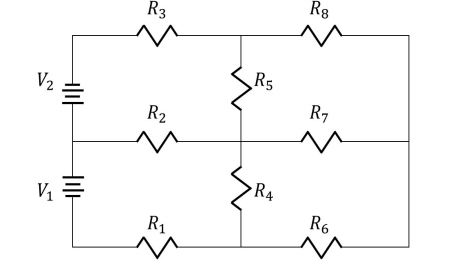

Dengan menerapkan hukum Ohm dan Kirchoff didapatkanlah SPL seperti berikut.

$$\begin{align*}
\begin{bmatrix}
  R_1 + R_2 + R_4 &  -R_2 & 0 &  -R_4 \\
 -R_2 & R_2 + R_3 + R_5 & -R_5 &  0 \\
  0 & -R_5 &  R_5 + R_7 + R_8 & -R_7 \\
  -R_4 & 0 & -R_7 &  R_4 + R_6 + R_7\\
\end{bmatrix}
\begin{bmatrix}
i_1\\i_2\\i_3\\i_4\\
\end{bmatrix}=
\begin{bmatrix}
-V_1\\V_2\\0\\0
\end{bmatrix}
\end{align*}$$

Hitung solusi $i$ dengan metode eliminasi Gauss, jika diketahui $R_1 = R_2 = R_3 = 100, R_4 = R_5 = 150, R_6 = R_7 = R_8 = 200, V_1 = 10,$ dan $V_2 = 12$.

In [307]:
R1 = R2 = R3 = 100.0
R4 = R5 = 150.0
R6 = R7 = R8 = 200.0
V1 = 10.0
V2 = 12.0

A6 = [R1+R2+R4 -R2 0.0 -R4
      -R2 R2+R3+R5 -R5 0.0
      0.0 -R5 R5+R7+R8 -R7
      -R4 0.0 -R7 R4+R6+R7];
B6 = [-V1;V2;0.0;0.0];

In [308]:
in6 = elimGaussNonPivoting(A6,B6)

4×1 Matrix{Float64}:
 -0.020805860805860808
  0.03157509157509157
  0.007545787545787543
 -0.002930402930402932

In [309]:
ip6 = elimGaussWithPivoting(A6,B6)

4×1 Matrix{Float64}:
 -0.020805860805860808
  0.03157509157509157
  0.007545787545787543
 -0.002930402930402932

In [310]:
A6*in6

4×1 Matrix{Float64}:
 -10.0
  12.0
  -4.579669976578771e-16
   2.0469737016526324e-16

In [311]:
A6*ip6

4×1 Matrix{Float64}:
 -10.0
  12.0
  -4.579669976578771e-16
   2.0469737016526324e-16

<hr style="border:2px solid black"> </hr>

### __Soal 7__

Diberikan suatu sistem persamaan linear yaitu
$$x+αy = 1$$
$$x+βy = 1$$

dengan terdapat empat kasus untuk nilai $α$ dan $β$, yaitu

$•$ $α = 101/100$ dan $β = 99/100$

$•$ $α = 11/10$ dan $β = 9/10$

$•$ $α = 15$ dan $β = 5$

$•$ $α = 1+δ$ dan $β = 1−δ$ dengan $δ = 10^{−8}$

Untuk setiap kasus tersebut,

__(a)__ Cari solusi numerik dari SPL tersebut menggunakan metode eliminasi Gauss (dengan ataupun tanpa _pivoting_)

__(b)__ Periksa galat absolut masing-masing solusi numerik, jika diketahui solusi eksak dari keempat kasus adalah $x = 1$ dan $y = 0.$

__(c)__ Jika kondisi dari suatu matriks A dari SPL $Ax = b$ dapat dihitung pada Julia dengan perintah ```cond(A,2)``` yang terdapat pada paket ```LinearAlgebra.jl```, jelaskan kaitan antara kondisi matriks tersebut dengan besarnya galat absolut yang diperoleh sebelumnya.

In [312]:
using LinearAlgebra

# Kasus 1
A71 = [1 101/100; 1 99/100]
b71 = [1; 1]
x_non = elimGaussNonPivoting(A71, b71)
x_pivot = elimGaussWithPivoting(A71, b71)
err_non = norm(x_non - [1, 0])
err_pivot = norm(x_pivot - [1, 0])
kondisi_A = cond(A71, 2)

println("\e[1mKasus 1: \e[0m")
println("\e[1m(a)\e[0m")
println("Solusi numerik tanpa pivoting: ", x_non)
println("Solusi numerik dengan pivoting: ", x_pivot)

println("\n\e[1m(b)\e[0m")
println("Galat absolut tanpa pivoting: ", err_non)
println("Galat absolut dengan pivoting: ", err_pivot)

println("\n\e[1m(c)\e[0m")
println("Kondisi matriks A kasus 1: ", kondisi_A)

Kasus 1: 
(a)
Solusi numerik tanpa pivoting: [1.0; -0.0;;]
Solusi numerik dengan pivoting: [1.0; -0.0;;]

(b)
Galat absolut tanpa pivoting: 0.0
Galat absolut dengan pivoting: 0.0

(c)
Kondisi matriks A kasus 1: 200.0050001249991


In [313]:
# Kasus 2
A72 = [1 11/10; 1 9/10]
b72 = [1; 1]
x_non = elimGaussNonPivoting(A72, b72)
x_pivot = elimGaussWithPivoting(A72, b72)
err_non = norm(x_non - [1, 0])
err_pivot = norm(x_pivot - [1, 0])
kondisi_A = cond(A72, 2)

println("\e[1mKasus 2: \e[0m")
println("\e[1m(a)\e[0m")
println("Solusi numerik tanpa pivoting: ", x_non)
println("Solusi numerik dengan pivoting: ", x_pivot)

println("\n\e[1m(b)\e[0m")
println("Galat absolut tanpa pivoting: ", err_non)
println("Galat absolut dengan pivoting: ", err_pivot)

println("\n\e[1m(c)\e[0m")
println("Kondisi matriks A kasus 2: ", kondisi_A)

Kasus 2: 
(a)
Solusi numerik tanpa pivoting: [1.0; -0.0;;]
Solusi numerik dengan pivoting: [1.0; -0.0;;]

(b)
Galat absolut tanpa pivoting: 0.0
Galat absolut dengan pivoting: 0.0

(c)
Kondisi matriks A kasus 2: 20.05012499921875


In [314]:
# Kasus 3
A73 = [1 15; 1 5]
b73 = [1; 1]
x_non = elimGaussNonPivoting(A73, b73)
x_pivot = elimGaussWithPivoting(A73, b73)
err_non = norm(x_non - [1, 0])
err_pivot = norm(x_pivot - [1, 0])
kondisi_A = cond(A73, 2)

println("\e[1mKasus 3: \e[0m")
println("\e[1m(a)\e[0m")
println("Solusi numerik tanpa pivoting: ", x_non)
println("Solusi numerik dengan pivoting: ", x_pivot)

println("\n\e[1m(b)\e[0m")
println("Galat absolut tanpa pivoting: ", err_non)
println("Galat absolut dengan pivoting: ", err_pivot)

println("\n\e[1m(c)\e[0m")
println("Kondisi matriks A kasus 3: ", kondisi_A)

Kasus 3: 
(a)
Solusi numerik tanpa pivoting: [1.0; -0.0;;]
Solusi numerik dengan pivoting: [1.0; -0.0;;]

(b)
Galat absolut tanpa pivoting: 0.0
Galat absolut dengan pivoting: 0.0

(c)
Kondisi matriks A kasus 3: 25.160254774486063


In [315]:
# Kasus 4
δ = 1e-8
A74 = [1 1+δ; 1 1-δ]
b74 = [1; 1]
x_non = elimGaussNonPivoting(A74, b74)
x_pivot = elimGaussWithPivoting(A74, b74)
err_non = norm(x_non - [1, 0])
err_pivot = norm(x_pivot - [1, 0])
kondisi_A = cond(A74, 2)

println("\e[1mKasus 4: \e[0m")
println("\e[1m(a)\e[0m")
println("Solusi numerik tanpa pivoting: ", x_non)
println("Solusi numerik dengan pivoting: ", x_pivot)

println("\n\e[1m(b)\e[0m")
println("Galat absolut tanpa pivoting: ", err_non)
println("Galat absolut dengan pivoting: ", err_pivot)

println("\n\e[1m(c)\e[0m")
println("Kondisi matriks A kasus 4: ", kondisi_A)

Kasus 4: 
(a)
Solusi numerik tanpa pivoting: [1.0; -0.0;;]
Solusi numerik dengan pivoting: [1.0; -0.0;;]

(b)
Galat absolut tanpa pivoting: 0.0
Galat absolut dengan pivoting: 0.0

(c)
Kondisi matriks A kasus 4: 2.0000000070735085e8


__Penjelasan  :__

Kondisi matriks merupakan sebuah ukuran yang menggambarkan seberapa baik sebuah matriks mempertahankan stabilitas numerik dalam proses solusi numerik dari sebuah sistem persamaan linear (SPL). Semakin besar kondisi matriks, berpotensi membuat galat absolut semakin besar juga. Kondisi matriks yang tinggi menunjukkan bahwa matriks tersebut memiliki singularitas yang mendekati atau mencapai nilai tak hingga, sehingga solusi numerik menjadi lebih sensitif terhadap gangguan pada vektor hasilnya. Hal ini dapat menyebabkan peningkatan galat numerik yang signifikan. Dengan demikian, kondisi matriks memberikan indikasi tentang seberapa baik kondisi sistem persamaan linear tersebut dari segi numerik dan petunjuk tentang seberapa akurat solusi numerik yang diharapkan dan seberapa besar galat numerik yang mungkin timbul.

Dalam soal nomor 7 ini, matriks A pada kasus 4 memiliki nilai kondisi matriks yang paling besar $(2.0000000070735085×10^8)$. Itu artinya matriks ini memiliki potensi galat absolut yang lebih besar dari matriks lainnya.

<hr style="border:2px solid black"> </hr>